Implementation of mutli-layer perceptron with 2 hidden layers for multiple linear regression using python 

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [144]:
dataset = pd.read_csv('50_Startups.csv')
print(dataset.head())
print(dataset.shape)

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
(50, 5)


In [145]:
X = np.array(dataset.iloc[:,0:3])
y = np.array(dataset.iloc[:, 4])
print(X.shape)
print('input :', X[:5])
print(y.shape)
print('Target :', y[:5])

(50, 3)
input : [[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]]
(50,)
Target : [192261.83 191792.06 191050.39 182901.99 166187.94]


Dataset Features Normalizations

In [146]:
#Data set normalization without using SCIKIT library
X = (X - X.mean()) / X.std()
print(X[:5])

y = (y - y.mean()) / y.std()
print(y)

[[ 0.31484664  0.01610715  3.53241077]
 [ 0.28595591  0.16814484  3.2396125 ]
 [ 0.18981598 -0.3592912   2.86199087]
 [ 0.0945905  -0.17526518  2.6022744 ]
 [ 0.07080728 -0.46170582  2.42344693]]
[ 2.01120333  1.99942997  1.98084225  1.77662724  1.35774012  1.12724963
  1.10548055  1.09620987  1.00746967  0.94602247  0.85484675  0.80816756
  0.74115484  0.55874952  0.51602637  0.44871967  0.3754357   0.33477114
  0.307116    0.26977265  0.16193522 -0.01753384 -0.04161264 -0.08216943
 -0.08672946 -0.11549309 -0.15736664 -0.17554233 -0.21879755 -0.27588222
 -0.3026246  -0.36412744 -0.36552389 -0.38178711 -0.38344421 -0.38929092
 -0.53393161 -0.5529549  -0.77149734 -0.77709368 -0.84641135 -0.85746568
 -1.01536466 -1.05896021 -1.17320899 -1.18008224 -1.56692212 -1.74062718
 -1.91321197 -2.43931323]


Splitting the dataset

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(40, 3)
(10, 3)


Implementation of multilayer perceptron model with 2 hidden layers from scratch

In [148]:
def initialize_params(x):
    '''
        initializes the parameters w1, w2, b1, and b2 with random values
        w1 : should be a 5 x 3 array since the hidden layer has 5 neurons and there are 3 input features
        b1 : should be a 1 x 5 array since hidden layer has 5 neurons and each should have one bias

        w2 : should be a 5 X 1 arrays since the output layer has one neuron and hidden layer has 5 
        b2 : should 1 X 1 because o/p layer contains only one neuron 
    '''
    w1 = np.random.randn(5, x.shape[1]) 
    w2 = np.random.randn(5,5)
    w3 = np.random.randn(1, 5)
    
    b1 = np.random.randn(5, 1)
    b2 = np.random.randn(5, 1)
    b3 = np.random.randn(1, 1)
    return w1,w2,w3,b1,b2,b3

In [149]:
w1 ,w2,w3,b1, b2, b3 = initialize_params(X_train)

In [150]:
def sigmoid_act(x):
    s = 1/(1+np.exp(-x))
    return s

In [151]:
def forward_path(x_train,w1,b1,w2,b2,w3,b3):
    '''
        first the forward propagation takes place
        the weights and biases set randomly are multipled with the X_train of hidden layer 
        then activation function is applied to them
        and the output of activation function is used as input to next layer
    '''

    #hidden layer 1
    z1 = np.matmul(w1, x_train.T) + b1
    A1 = sigmoid_act(z1) #output of hidden layer obtained by applying sigmoid activation function

    #hidden layer 2
    z2 = np.matmul(w2, A1) + b2
    A2 = sigmoid_act(z2)
    #output layer
    z3 = np.matmul(w3, A2) + b3
    A3 = z3     #linear activation function at output layer 

    return A3, A2, A1

In [152]:
# print(forward_path(X_train, w1,b1,w2,b2,w3,b3))


In [153]:
def compute_cost(y_pred, y_train):
    cost = np.mean((y_pred - y_train)**2)
    return cost

In [154]:
# print(dz2.shape)

In [155]:
def backward_path(A3,A2,A1,w3,Y_train, X_train):
    
    #backward propagations starts with modifying the weights and biases from the o/p layer
    #output layer
    dA3 = (2*(A3 - Y_train))/len(Y_train) #gradient of loss w.r.t A2
    dz3 = dA3                             #gradient of loss w.r.t z2
    dw3 = np.matmul(dz3, A2.T)            #gradient of loss w.r.t w2
    db3 = dz3.sum(axis = 1)               #gradient of loss w.r.t b2

    #hidden layer
    dA2 = (2*(A2 - Y_train))/len(Y_train) #gradient of loss w.r.t A2
    dz2 = dA2                             #gradient of loss w.r.t z2
    dw2 = np.matmul(dz2, A1.T)            #gradient of loss w.r.t w2
    db2 = dz2.sum(axis = 1)               #gradient of loss w.r.t b2

    #first layer
    dA1 = np.matmul(w2.T,dz2)
    dz1 = np.multiply(dA1, A1 * (1-A1))
    dw1 = np.matmul(dz1,  X_train)
    db1 = dz1.sum(axis = 1)
    return dw3, dw2, dw1, db3, db2, db1

In [156]:
def update_parameter(w, b, dw,db, learning_rate):
    w = w - learning_rate * dw
    db = np.reshape(db, b.shape)
    b = b - learning_rate * db
    return w, b

Training using batch gradient descent(BGD)

In [157]:
num_iters = 500
learning_rate = 0.001
his1 = []

w1,w2,w3,b1, b2, b3 = initialize_params(X_train)
for i in range(num_iters):
    A3,A2, A1 = forward_path(X_train, w1, b1, w2, b2, w3,b3)
    y_pred = A3
    cost = compute_cost(y_pred, y_train)
    dw3, dw2, dw1, db3, db2, db1 = backward_path(A3, A2, A1,w3,y_train, X_train)
    w3, b3 = update_parameter(w3,b3,dw3,db3,learning_rate)
    w2, b2 = update_parameter(w2,b2,dw2,db2,learning_rate)
    w1, b1 = update_parameter(w1,b1,dw1,db1,learning_rate)

    his1.append(cost)

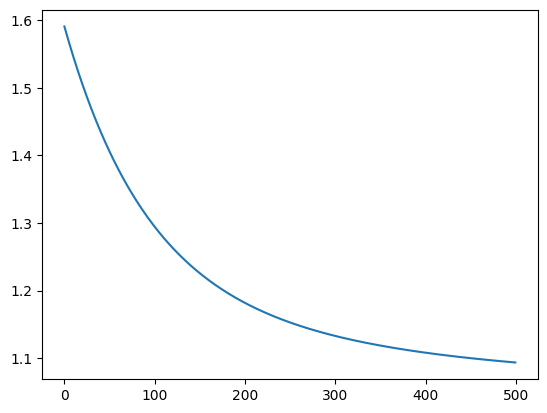

In [158]:
plt.plot(his1)

In [159]:
print(w1)
print(b1)

[[-0.70264774  1.54711942  1.19884851]
 [ 0.35337125  1.55610794  0.94194395]
 [ 0.93033422 -0.60134476  1.51863011]
 [-1.42685272  0.23129862  0.96154703]
 [ 0.39584937  0.08620779  0.2129171 ]]
[[-1.33920512]
 [-0.08822567]
 [ 1.29018011]
 [-0.34346673]
 [-0.61153094]]


In [160]:
print(w2)
print(b2)

[[ 0.1515657  -0.38012064  0.27543743 -0.92302287 -0.62626817]
 [ 0.03414574 -0.1460246  -0.70595916 -1.23829508  0.41262568]
 [-0.42827159 -0.38303099 -0.63771235 -0.0977448  -0.80580494]
 [ 0.55457591  0.18296327 -0.63646226  0.39973509 -0.60560657]
 [-0.78576435 -0.89410203  0.73706112 -1.13406517  0.44793543]]
[[ 0.27138774]
 [ 0.4481471 ]
 [-0.23045676]
 [-1.06997898]
 [ 0.91513196]]


In [161]:
print(w3)
print(b3)

[[-0.42844588 -0.63964582  2.25807622 -1.15513818 -0.14797455]]
[[0.23060833]]


MLP model prediction on test data

In [162]:
def pred(w1,w2,w3,b1,b2,b3,x_test):
    A3, A2, A1 = forward_path(x_test, w1,b1,w2,b2,w3,b3)
    return A3

In [163]:
y_pred = pred(w1,w2,w3,b1,b2,b3,X_test)

In [164]:
print(y_test)
print(y_test.shape)

[-0.3026246  -1.17320899  0.94602247  0.74115484  0.55874952 -2.43931323
 -0.36552389 -0.01753384  1.77662724 -0.21879755]
(10,)


In [165]:
y_pred = np.reshape(y_pred, (len(X_test), 1))
print(y_pred)
print(y_pred.shape)

[[ 0.07413049]
 [ 0.12299887]
 [-0.09613287]
 [-0.07783684]
 [-0.08839228]
 [ 0.16139314]
 [ 0.09475864]
 [-0.12959143]
 [-0.14136605]
 [-0.03047665]]
(10, 1)


Accuracy 

In [166]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.9460612470072343
RMSE : 1.2124347580602284


In [167]:
calculation = pd.DataFrame(np.c_[y_test, y_pred], columns=["Original profit", "Predict Profit"])
calculation

,Original profit,Predict Profit
0,-0.302625,0.074130
1,-1.173209,0.122999
2,0.946022,-0.096133
3,0.741155,-0.077837
4,0.558750,-0.088392
5,-2.439313,0.161393
6,-0.365524,0.094759
7,-0.017534,-0.129591
8,1.776627,-0.141366
9,-0.218798,-0.030477


Training using SGD

In [168]:
# num_iters = 500
# learning_rate = 0.001
# his1 = []

# w1,w2,w3,b1, b2,b3 = initialize_params(X_train)
# for i in range(num_iters):
#     cost = 0
#     for j in range(len(X_train)):
#         A3,A2, A1 = forward_path(X_train, w1, b1, w2, b2,w3, b3)
#         y_pred = A3
#         cost = compute_cost(y_pred, y_train)
#         dw3,dw2, dw1,db3, db2, db1 = backward_path(A3,A2, A1,w3,y_train, X_train)
#         w3, b3 = update_parameter(w3,b3,dw3,db3,learning_rate)
#         w2, b2 = update_parameter(w2,b2,dw2,db2,learning_rate)
#         w1, b1 = update_parameter(w1,b1,dw1,db1,learning_rate)

#     his1.append(cost/len(X_train))

In [169]:
# plt.plot(his1)